# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [12]:
# Cargar el dataset de vinos tintos
wine_data = pd.read_csv('winequality-red.csv', sep=';')
print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [13]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Muestra la información general del dataset (tipos de datos, valores no nulos)
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
# Calcula y muestra las estadísticas descriptivas del dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
# Verifica si hay valores nulos en el dataset
print("Valores nulos por columna:")
print(wine_data.isnull().sum())
print(f"\nTotal de valores nulos en el dataset: {wine_data.isnull().sum().sum()}")


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total de valores nulos en el dataset: 0


### Ejercicio 2.2: Análisis de la variable objetivo

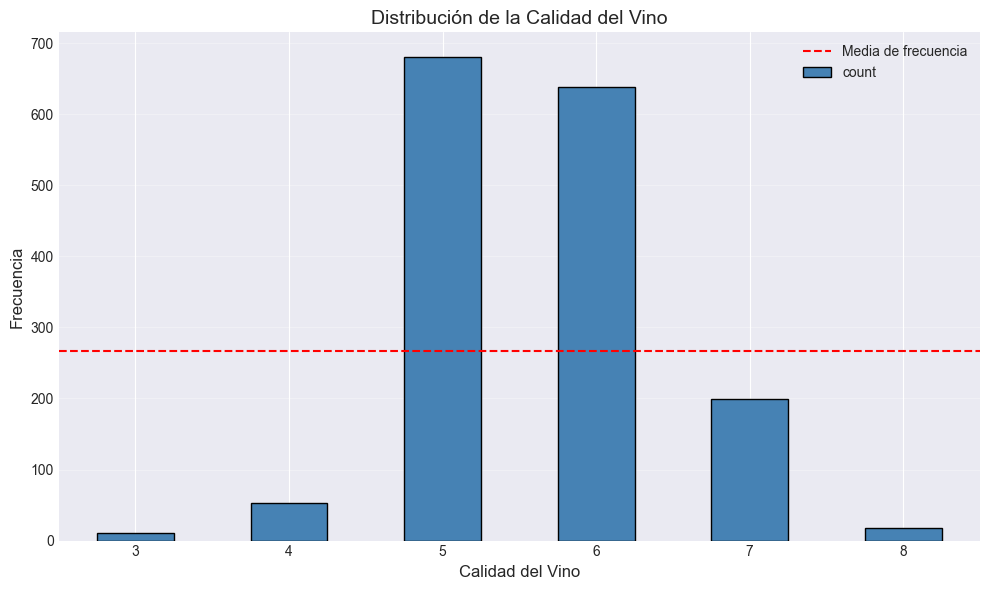

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [17]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación

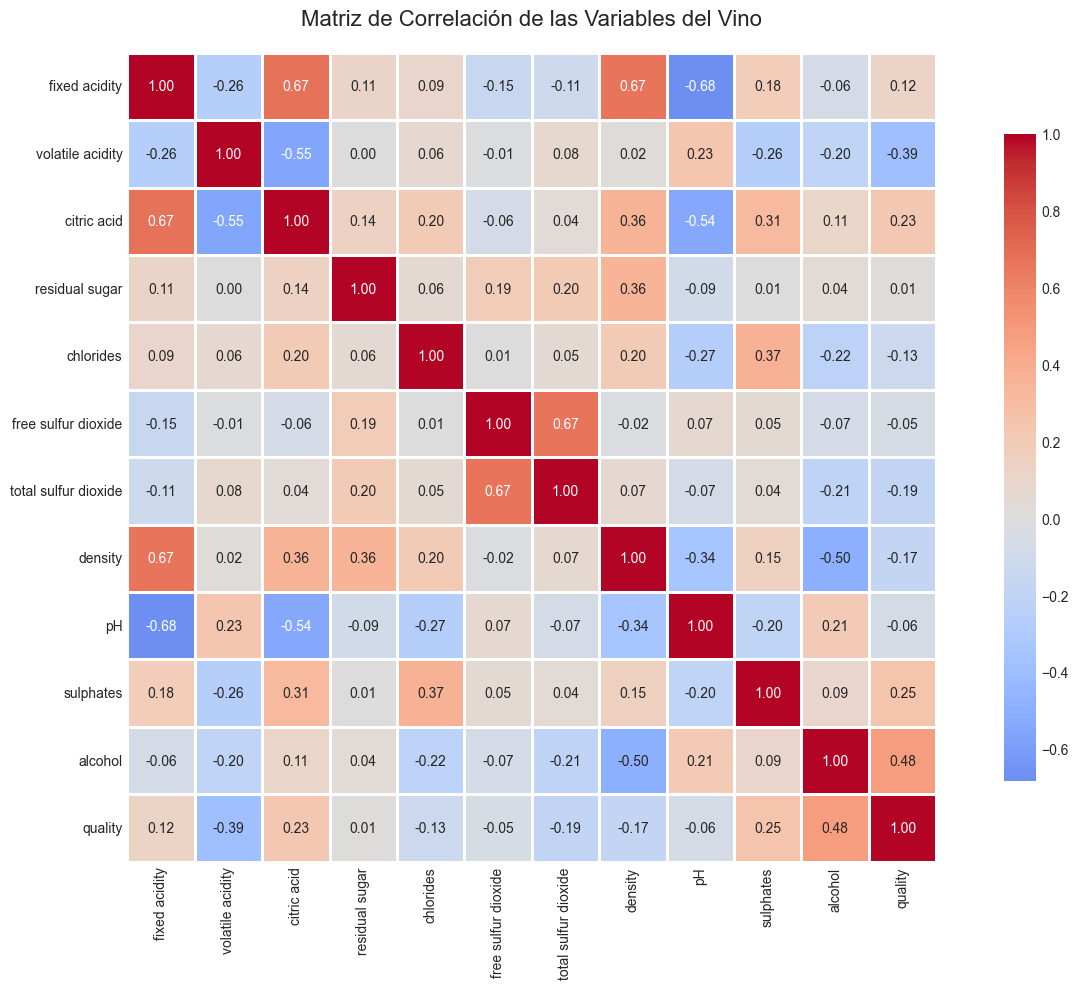


Correlaciones con la variable 'quality' (ordenadas):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [18]:
# Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
plt.figure(figsize=(14, 10))
# Calcular la matriz de correlación
correlation_matrix = wine_data.corr()
# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de las Variables del Vino', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más fuertes con la calidad
print("\nCorrelaciones con la variable 'quality' (ordenadas):")
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_corr)

In [19]:
# Identifica y muestra las 5 variables más correlacionadas con 'quality'
# Obtener correlaciones con quality (excluyendo quality misma)
quality_correlations = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False)

print("Top 5 variables más correlacionadas con 'quality':")
print("\nVariable                    | Correlación")
print("-" * 45)
for variable, corr_value in quality_correlations.head(5).items():
    # Obtener el valor con signo original
    original_corr = correlation_matrix.loc[variable, 'quality']
    print(f"{variable:27} | {original_corr:+.4f}")

Top 5 variables más correlacionadas con 'quality':

Variable                    | Correlación
---------------------------------------------
alcohol                     | +0.4762
volatile acidity            | -0.3906
sulphates                   | +0.2514
citric acid                 | +0.2264
total sulfur dioxide        | -0.1851


### Ejercicio 2.4: Visualización de relaciones

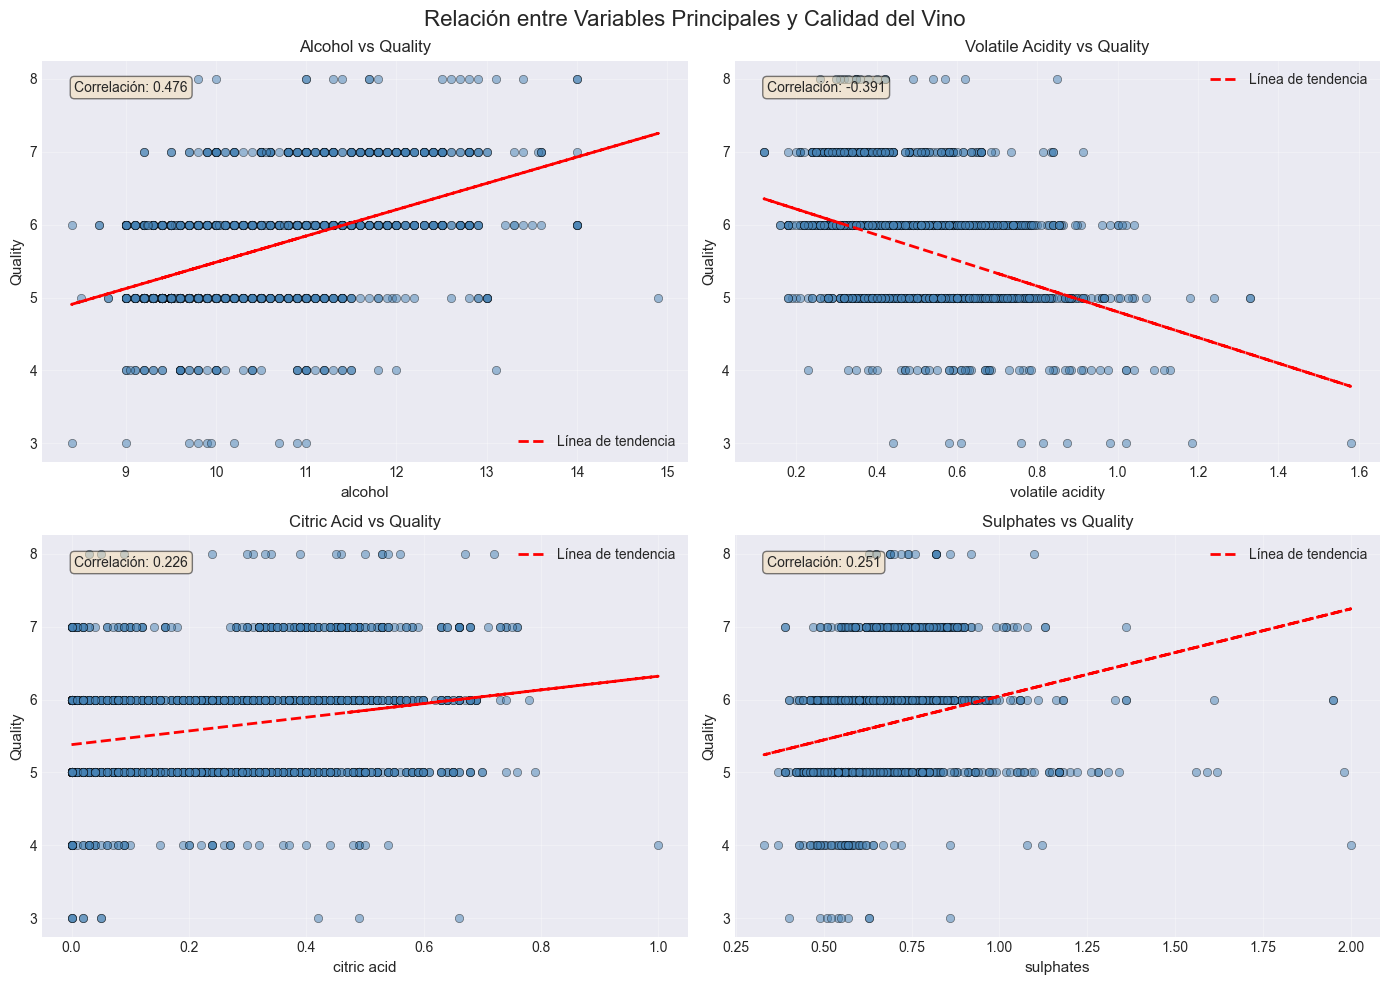

In [20]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # Crear scatter plot
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.5, color='steelblue', edgecolors='black', linewidth=0.5)
    
    # Calcular y agregar línea de tendencia
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature], p(wine_data[feature]), "r--", linewidth=2, label='Línea de tendencia')
    
    # Configurar el gráfico
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Quality', fontsize=11)
    ax.set_title(f'{feature.title()} vs Quality', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Calcular y mostrar la correlación
    corr = wine_data[feature].corr(wine_data['quality'])
    ax.text(0.05, 0.95, f'Correlación: {corr:.3f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [21]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [22]:
# Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(f"\nPorcentaje de entrenamiento: {(X_train.shape[0] / len(X)) * 100:.1f}%")
print(f"Porcentaje de prueba: {(X_test.shape[0] / len(X)) * 100:.1f}%")

Tamaño del conjunto de entrenamiento: 1279 muestras
Tamaño del conjunto de prueba: 320 muestras

Porcentaje de entrenamiento: 80.0%
Porcentaje de prueba: 20.0%


In [23]:
# Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Estandarización completada!")
print(f"\nForma de X_train_scaled: {X_train_scaled.shape}")
print(f"Forma de X_test_scaled: {X_test_scaled.shape}")
print(f"\nEstadísticas de X_train_scaled:")
print(f"Media: {X_train_scaled.mean():.6f}")
print(f"Desviación estándar: {X_train_scaled.std():.6f}")

Estandarización completada!

Forma de X_train_scaled: (1279, 11)
Forma de X_test_scaled: (320, 11)

Estadísticas de X_train_scaled:
Media: 0.000000
Desviación estándar: 1.000000


## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [24]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)
for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# Identifica el mejor alpha basado en el RMSE medio más bajo
best_result = min(cv_results_manual, key=lambda x: x['mean_rmse'])
print("\n" + "=" * 50)
print(f"Mejor Alpha: {best_result['alpha']}")
print(f"Mejor RMSE: {best_result['mean_rmse']:.4f} (+/- {best_result['std_rmse']:.4f})")
print("=" * 50)

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

Mejor Alpha: 100
Mejor RMSE: 0.6599 (+/- 0.0139)


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [25]:
# Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'
alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_:.4f}")

# Evaluar el modelo con el mejor alpha
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv))
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)

print(f"\nMétricas en el conjunto de prueba:")
print(f"RMSE: {rmse_ridge_cv:.4f}")
print(f"R²: {r2_ridge_cv:.4f}")
print(f"MAE: {mae_ridge_cv:.4f}")

Mejor alpha encontrado por RidgeCV: 81.1131

Métricas en el conjunto de prueba:
RMSE: 0.6262
R²: 0.4001
MAE: 0.5063


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [26]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_ridge.fit(X_train_scaled, y_train)

print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor score (RMSE): {np.sqrt(-grid_search_ridge.best_score_):.4f}")

# Evaluar en conjunto de prueba
y_pred_grid = grid_search_ridge.predict(X_test_scaled)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
r2_grid = r2_score(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)

print(f"\nMétricas en el conjunto de prueba:")
print(f"RMSE: {rmse_grid:.4f}")
print(f"R²: {r2_grid:.4f}")
print(f"MAE: {mae_grid:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejor alpha: 54.5559
Mejor score (RMSE): 0.6624

Métricas en el conjunto de prueba:
RMSE: 0.6255
R²: 0.4013
MAE: 0.5053


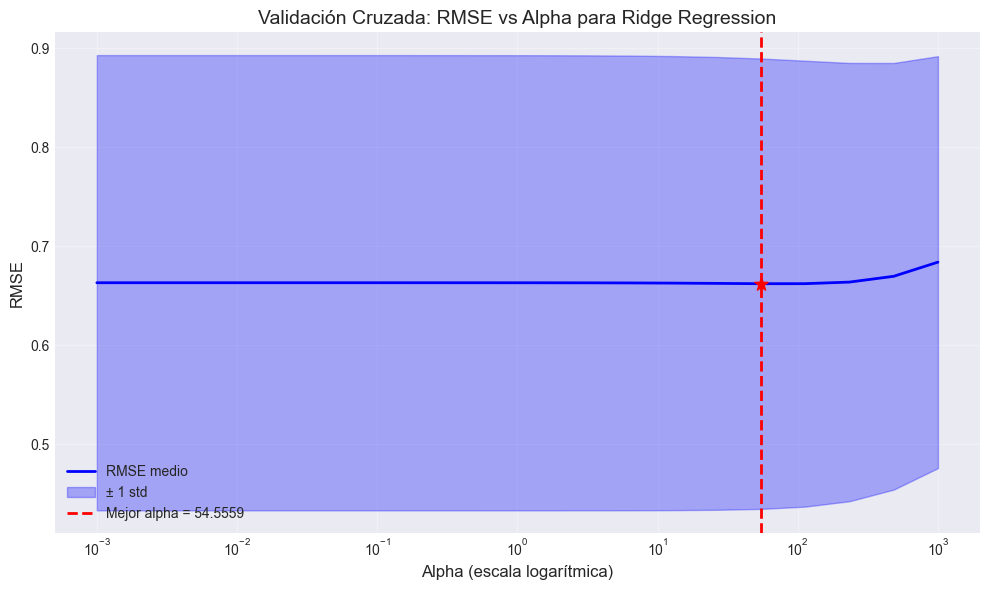

In [27]:
# Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
plt.figure(figsize=(10, 6))

# Extraer resultados de GridSearchCV
results = grid_search_ridge.cv_results_
alphas_tested = results['param_alpha'].data
mean_scores = np.sqrt(-results['mean_test_score'])  # Convertir a RMSE
std_scores = np.sqrt(results['std_test_score'])

# Crear el gráfico
plt.plot(alphas_tested, mean_scores, 'b-', linewidth=2, label='RMSE medio')
plt.fill_between(alphas_tested, 
                 mean_scores - std_scores, 
                 mean_scores + std_scores, 
                 alpha=0.3, color='blue', label='± 1 std')

# Marcar el mejor alpha
best_alpha = grid_search_ridge.best_params_['alpha']
best_rmse = np.sqrt(-grid_search_ridge.best_score_)
plt.axvline(x=best_alpha, color='red', linestyle='--', linewidth=2, label=f'Mejor alpha = {best_alpha:.4f}')
plt.scatter([best_alpha], [best_rmse], color='red', s=100, zorder=5, marker='*')

# Configurar el gráfico
plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Validación Cruzada: RMSE vs Alpha para Ridge Regression', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [28]:
# Implementa y entrena un modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)

print("=" * 50)
print("Regresión Lineal Normal:")
print("=" * 50)
print(f"RMSE Train: {rmse_lr_train:.4f}")
print(f"RMSE Test:  {rmse_lr_test:.4f}")
print(f"R² Train:   {r2_lr_train:.4f}")
print(f"R² Test:    {r2_lr_test:.4f}")
print(f"MAE Train:  {mae_lr_train:.4f}")
print(f"MAE Test:   {mae_lr_test:.4f}")
print("=" * 50)

Regresión Lineal Normal:
RMSE Train: 0.6513
RMSE Test:  0.6245
R² Train:   0.3480
R² Test:    0.4032
MAE Train:  0.4996
MAE Test:   0.5035


### 5.2 Ridge Regression con mejor alpha de CV

In [29]:
# Entrena Ridge con el mejor alpha encontrado por validación cruzada
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test = ridge_model.predict(X_test_scaled)

# Calcular métricas
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

print("=" * 50)
print(f"Ridge Regression (alpha = {best_alpha_ridge:.4f}):")
print("=" * 50)
print(f"RMSE Train: {rmse_ridge_train:.4f}")
print(f"RMSE Test:  {rmse_ridge_test:.4f}")
print(f"R² Train:   {r2_ridge_train:.4f}")
print(f"R² Test:    {r2_ridge_test:.4f}")
print(f"MAE Train:  {mae_ridge_train:.4f}")
print(f"MAE Test:   {mae_ridge_test:.4f}")
print("=" * 50)

Ridge Regression (alpha = 54.5559):
RMSE Train: 0.6516
RMSE Test:  0.6255
R² Train:   0.3474
R² Test:    0.4013
MAE Train:  0.5007
MAE Test:   0.5053


### 5.3 Lasso Regression con validación cruzada

In [30]:
# Implementa LassoCV para encontrar el mejor alpha automáticamente
alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha para Lasso: {lasso_cv.alpha_:.4f}")

# Contar características seleccionadas (coeficientes no cero)
non_zero_coefs = np.sum(lasso_cv.coef_ != 0)
print(f"Número de características seleccionadas: {non_zero_coefs} de {len(lasso_cv.coef_)}")

# Hacer predicciones
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)

# Calcular métricas
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print("\n" + "=" * 50)
print(f"Lasso Regression (alpha = {lasso_cv.alpha_:.4f}):")
print("=" * 50)
print(f"RMSE Train: {rmse_lasso_train:.4f}")
print(f"RMSE Test:  {rmse_lasso_test:.4f}")
print(f"R² Train:   {r2_lasso_train:.4f}")
print(f"R² Test:    {r2_lasso_test:.4f}")
print(f"MAE Train:  {mae_lasso_train:.4f}")
print(f"MAE Test:   {mae_lasso_test:.4f}")
print("=" * 50)

# Mostrar características seleccionadas
print("\nCaracterísticas y sus coeficientes:")
print("-" * 50)
feature_names = X.columns
for feature, coef in zip(feature_names, lasso_cv.coef_):
    if coef != 0:
        print(f"{feature:30} | {coef:+.6f}")
    else:
        print(f"{feature:30} | {coef:+.6f} (eliminada)")

Mejor alpha para Lasso: 0.0085
Número de características seleccionadas: 8 de 11

Lasso Regression (alpha = 0.0085):
RMSE Train: 0.6522
RMSE Test:  0.6266
R² Train:   0.3462
R² Test:    0.3991
MAE Train:  0.5015
MAE Test:   0.5071

Características y sus coeficientes:
--------------------------------------------------
fixed acidity                  | +0.009743
volatile acidity               | -0.171165
citric acid                    | -0.000000 (eliminada)
residual sugar                 | +0.000000 (eliminada)
chlorides                      | -0.080162
free sulfur dioxide            | +0.035793
total sulfur dioxide           | -0.100195
density                        | -0.000000 (eliminada)
pH                             | -0.051761
sulphates                      | +0.133200
alcohol                        | +0.298733


In [31]:
# Identifica qué características fueron eliminadas por Lasso
feature_names = X.columns
lasso_coefs = lasso_cv.coef_

# Separar características seleccionadas y eliminadas
selected_features = []
eliminated_features = []

for feature, coef in zip(feature_names, lasso_coefs):
    if coef != 0:
        selected_features.append((feature, coef))
    else:
        eliminated_features.append(feature)

print("=" * 60)
print("ANÁLISIS DE SELECCIÓN DE CARACTERÍSTICAS - LASSO")
print("=" * 60)

print(f"\n✅ Características SELECCIONADAS: {len(selected_features)}")
print("-" * 60)
# Ordenar por valor absoluto del coeficiente
selected_features.sort(key=lambda x: abs(x[1]), reverse=True)
for feature, coef in selected_features:
    print(f"  • {feature:30} | Coeficiente: {coef:+.6f}")

print(f"\n❌ Características ELIMINADAS: {len(eliminated_features)}")
print("-" * 60)
if eliminated_features:
    for feature in eliminated_features:
        print(f"  • {feature}")
else:
    print("  Ninguna característica fue eliminada")

print("\n" + "=" * 60)
print(f"Resumen: {len(selected_features)}/{len(feature_names)} características utilizadas")
print(f"Reducción: {len(eliminated_features)} características eliminadas")
print("=" * 60)


ANÁLISIS DE SELECCIÓN DE CARACTERÍSTICAS - LASSO

✅ Características SELECCIONADAS: 8
------------------------------------------------------------
  • alcohol                        | Coeficiente: +0.298733
  • volatile acidity               | Coeficiente: -0.171165
  • sulphates                      | Coeficiente: +0.133200
  • total sulfur dioxide           | Coeficiente: -0.100195
  • chlorides                      | Coeficiente: -0.080162
  • pH                             | Coeficiente: -0.051761
  • free sulfur dioxide            | Coeficiente: +0.035793
  • fixed acidity                  | Coeficiente: +0.009743

❌ Características ELIMINADAS: 3
------------------------------------------------------------
  • citric acid
  • residual sugar
  • density

Resumen: 8/11 características utilizadas
Reducción: 3 características eliminadas


## 6. Comparación de Modelos

In [34]:
# Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test
comparison_data = {
    'Modelo': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Train': [mae_lr_train, mae_ridge_train, mae_lasso_train],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)

print("=" * 100)
print("COMPARACIÓN DE MODELOS DE REGRESIÓN")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)

# Identificar el mejor modelo por cada métrica
print("\nMEJORES MODELOS POR MÉTRICA:")
print("-" * 100)

best_rmse_idx = comparison_df['RMSE Test'].idxmin()
best_r2_idx = comparison_df['R² Test'].idxmax()
best_mae_idx = comparison_df['MAE Test'].idxmin()

print(f"Mejor RMSE Test: {comparison_df.loc[best_rmse_idx, 'Modelo']} - {comparison_df.loc[best_rmse_idx, 'RMSE Test']:.4f}")
print(f"Mejor R2 Test:   {comparison_df.loc[best_r2_idx, 'Modelo']} - {comparison_df.loc[best_r2_idx, 'R² Test']:.4f}")
print(f"Mejor MAE Test:  {comparison_df.loc[best_mae_idx, 'Modelo']} - {comparison_df.loc[best_mae_idx, 'MAE Test']:.4f}")
print("=" * 100)

COMPARACIÓN DE MODELOS DE REGRESIÓN
           Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Train  MAE Test
Linear Regression     0.65130   0.624520  0.347993 0.403180   0.499620  0.503530
 Ridge Regression     0.65159   0.625499  0.347412 0.401307   0.500684  0.505316
 Lasso Regression     0.65217   0.626642  0.346250 0.399117   0.501493  0.507139

MEJORES MODELOS POR MÉTRICA:
----------------------------------------------------------------------------------------------------
Mejor RMSE Test: Linear Regression - 0.6245
Mejor R2 Test:   Linear Regression - 0.4032
Mejor MAE Test:  Linear Regression - 0.5035


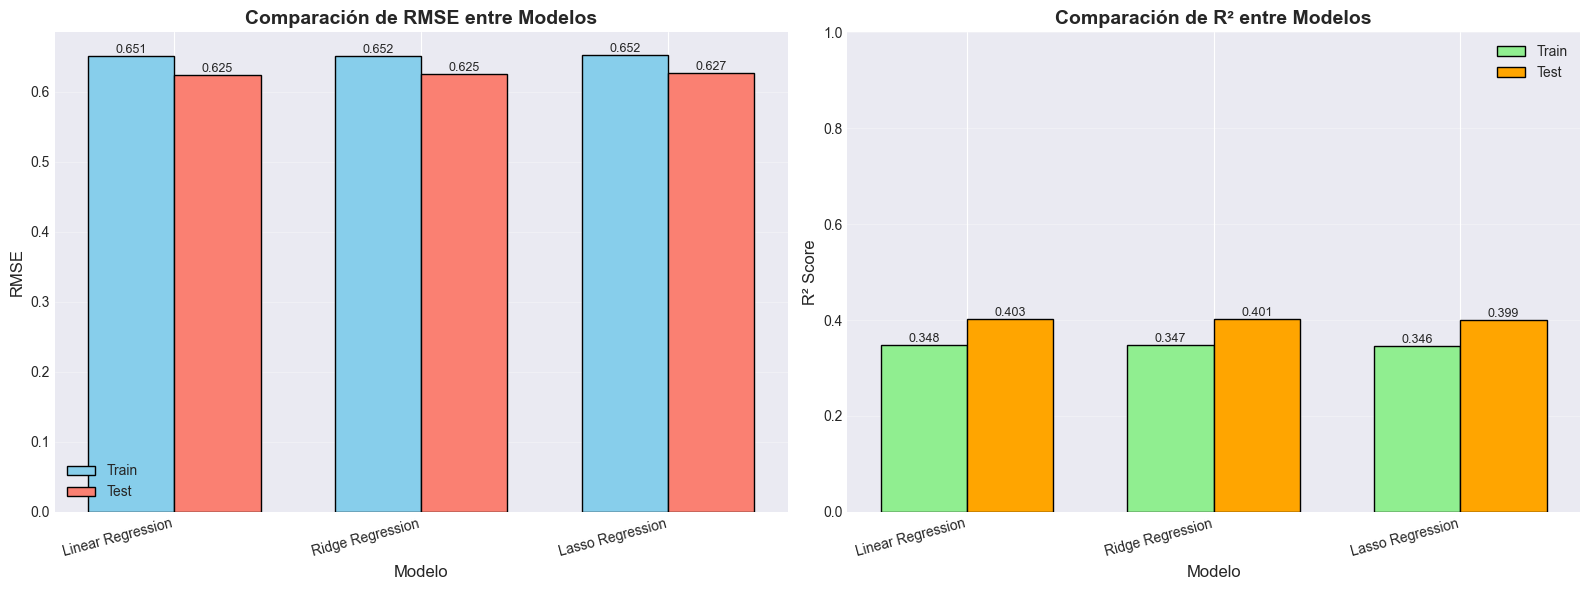

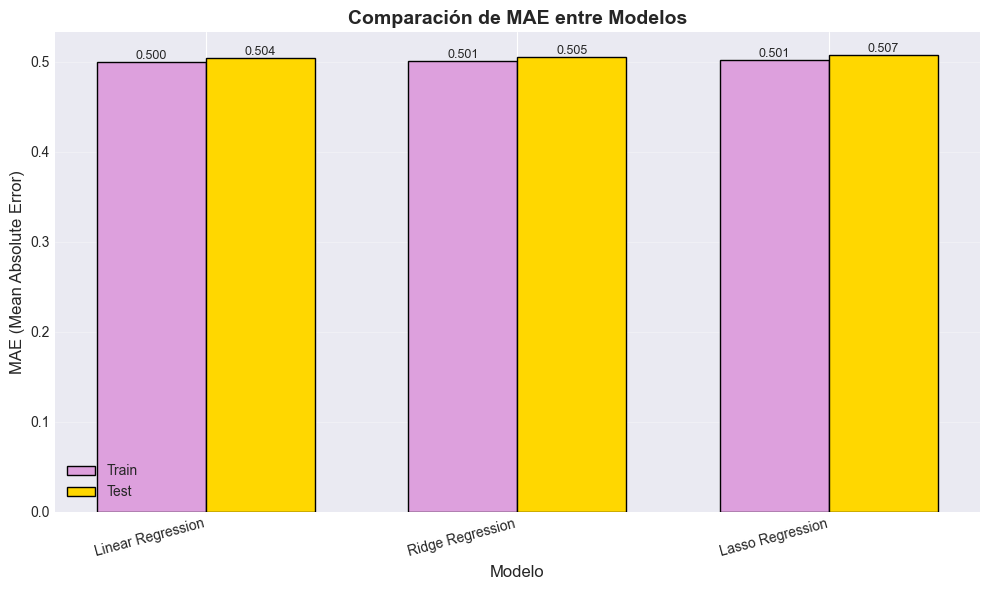

In [35]:
# Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
# 2. Gráfico de barras comparando R²

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparación de RMSE
ax1 = axes[0]
x_pos = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width, 
                label='Train', color='skyblue', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'], width, 
                label='Test', color='salmon', edgecolor='black')

ax1.set_xlabel('Modelo', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('Comparación de RMSE entre Modelos', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['Modelo'], rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

# Gráfico 2: Comparación de R²
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Train'], width, 
                label='Train', color='lightgreen', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, comparison_df['R² Test'], width, 
                label='Test', color='orange', edgecolor='black')

ax2.set_xlabel('Modelo', fontsize=12)
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('Comparación de R² entre Modelos', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison_df['Modelo'], rotation=15, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1])  # R² está entre 0 y 1

# Agregar valores en las barras
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Gráfico adicional: Comparación de MAE
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(comparison_df))
bars5 = plt.bar(x_pos - width/2, comparison_df['MAE Train'], width, 
                label='Train', color='plum', edgecolor='black')
bars6 = plt.bar(x_pos + width/2, comparison_df['MAE Test'], width, 
                label='Test', color='gold', edgecolor='black')

plt.xlabel('Modelo', fontsize=12)
plt.ylabel('MAE (Mean Absolute Error)', fontsize=12)
plt.title('Comparación de MAE entre Modelos', fontsize=14, fontweight='bold')
plt.xticks(x_pos, comparison_df['Modelo'], rotation=15, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 7. Análisis de Residuos

Análisis de residuos para: Linear Regression


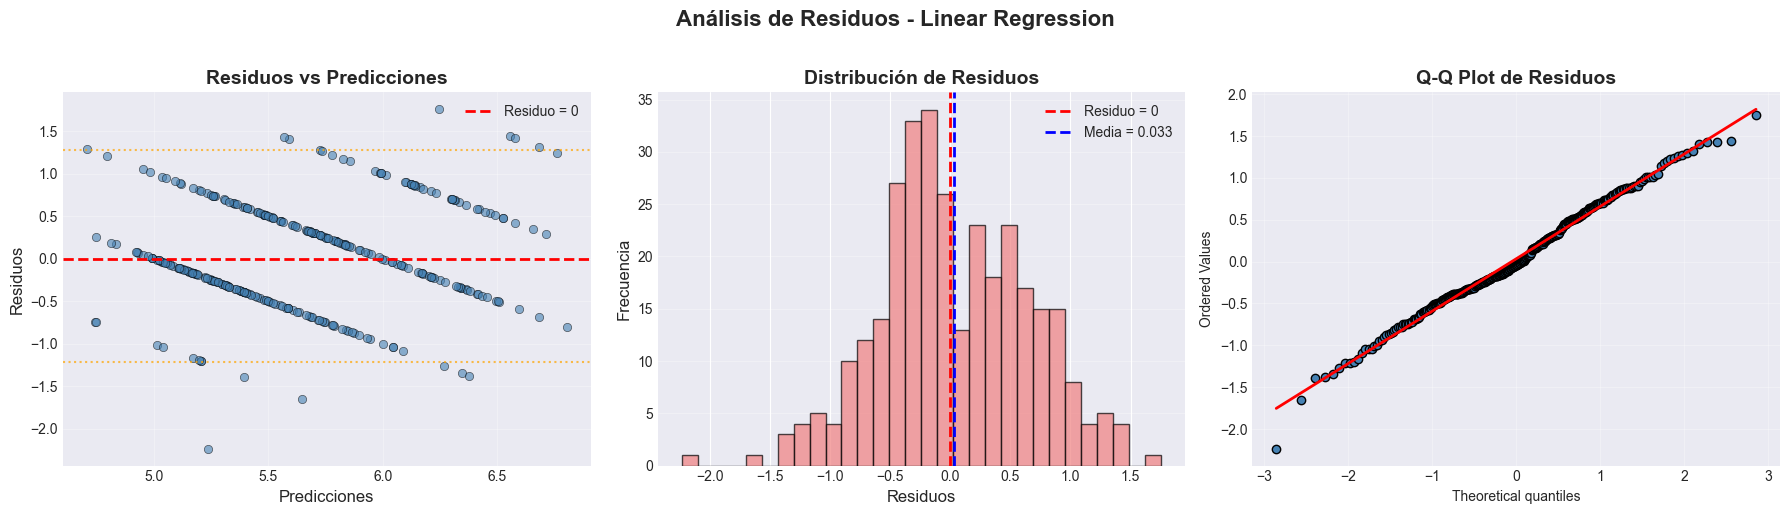


Estadísticas de los residuos:
------------------------------------------------------------
Media:                0.032969
Mediana:              -0.040115
Desviación estándar:  0.624626
Mínimo:               -2.233869
Máximo:               1.756051
Rango:                3.989920

Test de Normalidad (Shapiro-Wilk):
Estadístico: 0.993360
P-value:     0.170633
✅ Los residuos parecen seguir una distribución normal (p > 0.05)


In [36]:
# Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos

# Identificar el mejor modelo basado en RMSE Test
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']

# Seleccionar predicciones y modelo según el mejor
if best_model_name == 'Linear Regression':
    y_pred_best = y_pred_lr_test
    best_model = lr_model
elif best_model_name == 'Ridge Regression':
    y_pred_best = y_pred_ridge_test
    best_model = ridge_model
else:  # Lasso Regression
    y_pred_best = y_pred_lasso_test
    best_model = lasso_cv

# Calcular residuos
residuals = y_test - y_pred_best

print(f"Análisis de residuos para: {best_model_name}")
print("=" * 60)

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Gráfico de residuos vs predicciones
ax1 = axes[0]
ax1.scatter(y_pred_best, residuals, alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax1.set_xlabel('Predicciones', fontsize=12)
ax1.set_ylabel('Residuos', fontsize=12)
ax1.set_title('Residuos vs Predicciones', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Agregar líneas de referencia para detectar patrones
mean_residual = residuals.mean()
std_residual = residuals.std()
ax1.axhline(y=mean_residual + 2*std_residual, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
ax1.axhline(y=mean_residual - 2*std_residual, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)

# 2. Histograma de residuos
ax2 = axes[1]
ax2.hist(residuals, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax2.axvline(x=residuals.mean(), color='blue', linestyle='--', linewidth=2, label=f'Media = {residuals.mean():.3f}')
ax2.set_xlabel('Residuos', fontsize=12)
ax2.set_ylabel('Frecuencia', fontsize=12)
ax2.set_title('Distribución de Residuos', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.legend()

# 3. Q-Q plot de residuos
from scipy import stats
ax3 = axes[2]
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot de Residuos', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
# Mejorar el formato del Q-Q plot
ax3.get_lines()[0].set_markerfacecolor('steelblue')
ax3.get_lines()[0].set_markeredgecolor('black')
ax3.get_lines()[0].set_markersize(6)
ax3.get_lines()[1].set_color('red')
ax3.get_lines()[1].set_linewidth(2)

plt.suptitle(f'Análisis de Residuos - {best_model_name}', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Estadísticas de los residuos
print(f"\nEstadísticas de los residuos:")
print("-" * 60)
print(f"Media:                {residuals.mean():.6f}")
print(f"Mediana:              {residuals.median():.6f}")
print(f"Desviación estándar:  {residuals.std():.6f}")
print(f"Mínimo:               {residuals.min():.6f}")
print(f"Máximo:               {residuals.max():.6f}")
print(f"Rango:                {residuals.max() - residuals.min():.6f}")

# Test de normalidad de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\nTest de Normalidad (Shapiro-Wilk):")
print(f"Estadístico: {shapiro_stat:.6f}")
print(f"P-value:     {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("✅ Los residuos parecen seguir una distribución normal (p > 0.05)")
else:
    print("⚠️  Los residuos NO siguen una distribución normal (p < 0.05)")
print("=" * 60)

## 8. Importancia de Características

COMPARACIÓN DE COEFICIENTES ENTRE MODELOS
             Feature  Linear Regression  Ridge Regression  Lasso Regression
         citric acid          -0.027512         -0.013277         -0.000000
      residual sugar           0.009421          0.014932          0.000000
             density          -0.019204         -0.039385         -0.000000
                  pH          -0.060610         -0.045157         -0.051761
 free sulfur dioxide           0.058015          0.049969          0.035793
       fixed acidity           0.039789          0.051904          0.009743
           chlorides          -0.089084         -0.086383         -0.080162
total sulfur dioxide          -0.120008         -0.112970         -0.100195
           sulphates           0.146815          0.143665          0.133200
    volatile acidity          -0.179439         -0.170488         -0.171165
             alcohol           0.296628          0.274520          0.298733


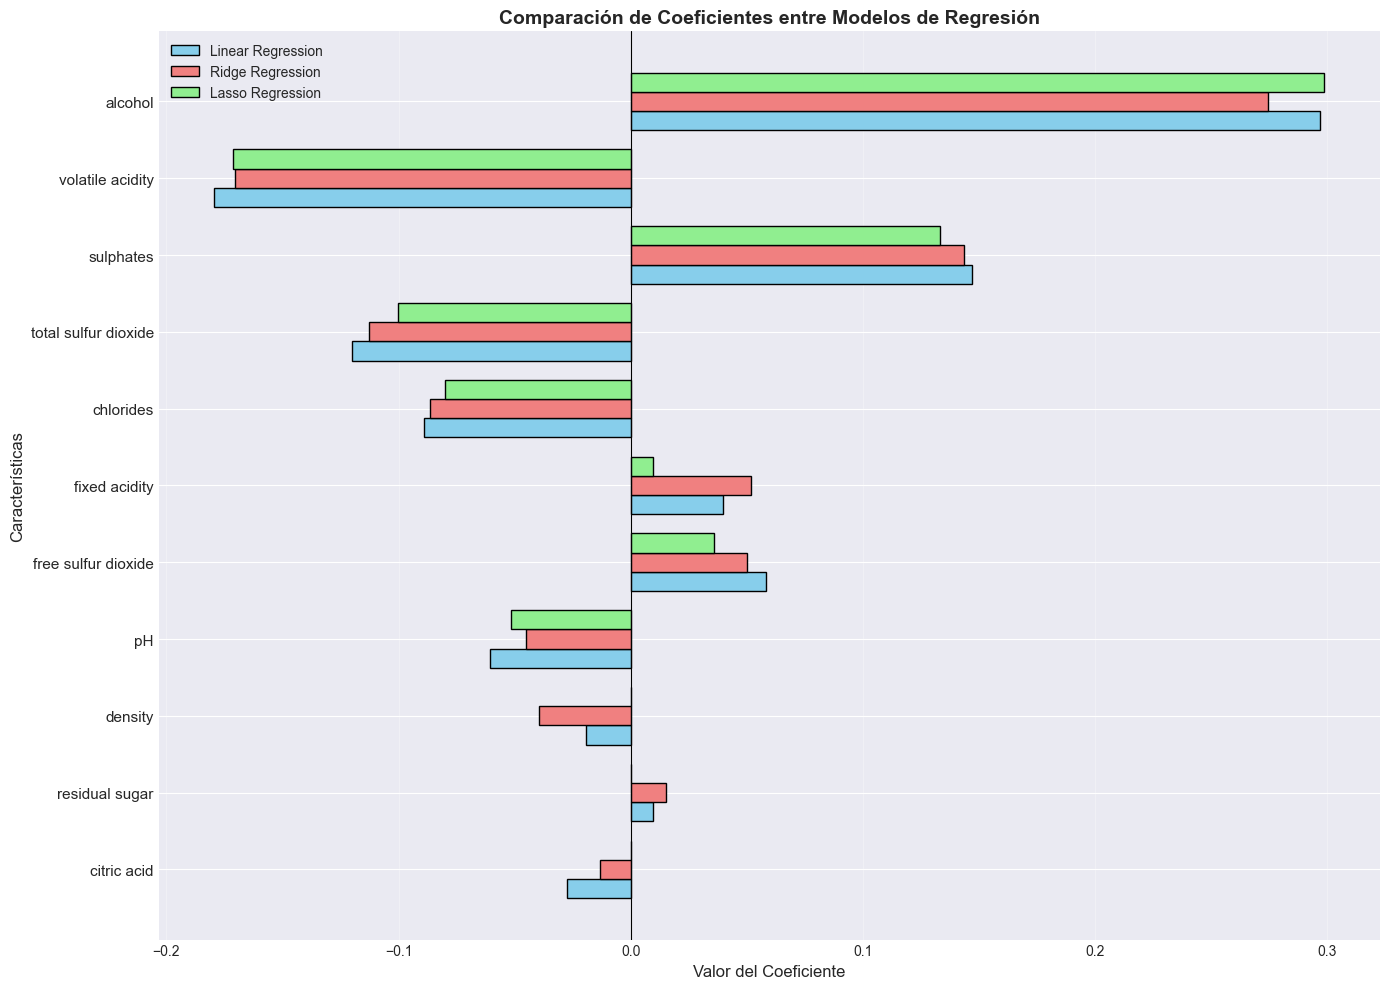


ANÁLISIS DE COEFICIENTES:
--------------------------------------------------------------------------------

Características con mayor impacto (por valor absoluto en Ridge):
  • alcohol                        | Coeficiente: +0.274520
  • volatile acidity               | Coeficiente: -0.170488
  • sulphates                      | Coeficiente: +0.143665
  • total sulfur dioxide           | Coeficiente: -0.112970
  • chlorides                      | Coeficiente: -0.086383

Características eliminadas por Lasso:
  • citric acid
  • residual sugar
  • density


In [38]:
# Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes

# Obtener los coeficientes de cada modelo
feature_names = X.columns
lr_coefs = lr_model.coef_
ridge_coefs = ridge_model.coef_
lasso_coefs = lasso_cv.coef_

# Crear DataFrame con los coeficientes
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': lr_coefs,
    'Ridge Regression': ridge_coefs,
    'Lasso Regression': lasso_coefs
})

# Ordenar por valor absoluto del coeficiente de Ridge
coef_comparison['abs_ridge'] = coef_comparison['Ridge Regression'].abs()
coef_comparison = coef_comparison.sort_values('abs_ridge', ascending=True)
coef_comparison = coef_comparison.drop('abs_ridge', axis=1)

print("=" * 80)
print("COMPARACIÓN DE COEFICIENTES ENTRE MODELOS")
print("=" * 80)
print(coef_comparison.to_string(index=False))
print("=" * 80)

# Visualización: Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 10))

x_pos = np.arange(len(coef_comparison))
width = 0.25

bars1 = ax.barh(x_pos - width, coef_comparison['Linear Regression'], width, 
                label='Linear Regression', color='skyblue', edgecolor='black')
bars2 = ax.barh(x_pos, coef_comparison['Ridge Regression'], width, 
                label='Ridge Regression', color='lightcoral', edgecolor='black')
bars3 = ax.barh(x_pos + width, coef_comparison['Lasso Regression'], width, 
                label='Lasso Regression', color='lightgreen', edgecolor='black')

ax.set_yticks(x_pos)
ax.set_yticklabels(coef_comparison['Feature'], fontsize=11)
ax.set_xlabel('Valor del Coeficiente', fontsize=12)
ax.set_ylabel('Características', fontsize=12)
ax.set_title('Comparación de Coeficientes entre Modelos de Regresión', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de diferencias
print("\nANÁLISIS DE COEFICIENTES:")
print("-" * 80)
print("\nCaracterísticas con mayor impacto (por valor absoluto en Ridge):")
top_features = coef_comparison.iloc[-5:][['Feature', 'Ridge Regression']].sort_values('Ridge Regression', key=abs, ascending=False)
for idx, row in top_features.iterrows():
    print(f"  • {row['Feature']:30} | Coeficiente: {row['Ridge Regression']:+.6f}")

print("\nCaracterísticas eliminadas por Lasso:")
eliminated = coef_comparison[coef_comparison['Lasso Regression'] == 0]['Feature'].tolist()
if eliminated:
    for feat in eliminated:
        print(f"  • {feat}")
else:
    print("  Ninguna")
print("=" * 80)


## 9. Validación Cruzada Final del Mejor Modelo

VALIDACIÓN CRUZADA CON 10 FOLDS - Linear Regression

Resultados por Fold:
--------------------------------------------------------------------------------
Fold     RMSE         R²           MAE         
--------------------------------------------------------------------------------
1        0.6258       0.2406       0.5018      
2        0.7166       0.3072       0.5481      
3        0.6920       0.4053       0.5264      
4        0.7009       0.1494       0.5398      
5        0.6794       0.2456       0.5334      
6        0.6738       0.3507       0.5197      
7        0.6675       0.3309       0.5105      
8        0.6789       0.2976       0.5107      
9        0.4959       0.5230       0.3767      
10       0.6483       0.3801       0.4870      
--------------------------------------------------------------------------------
Media    0.6579       0.3230       0.5054      
Std      0.0592       0.0973       0.0463      

RESUMEN DE VALIDACIÓN CRUZADA:
---------------------------

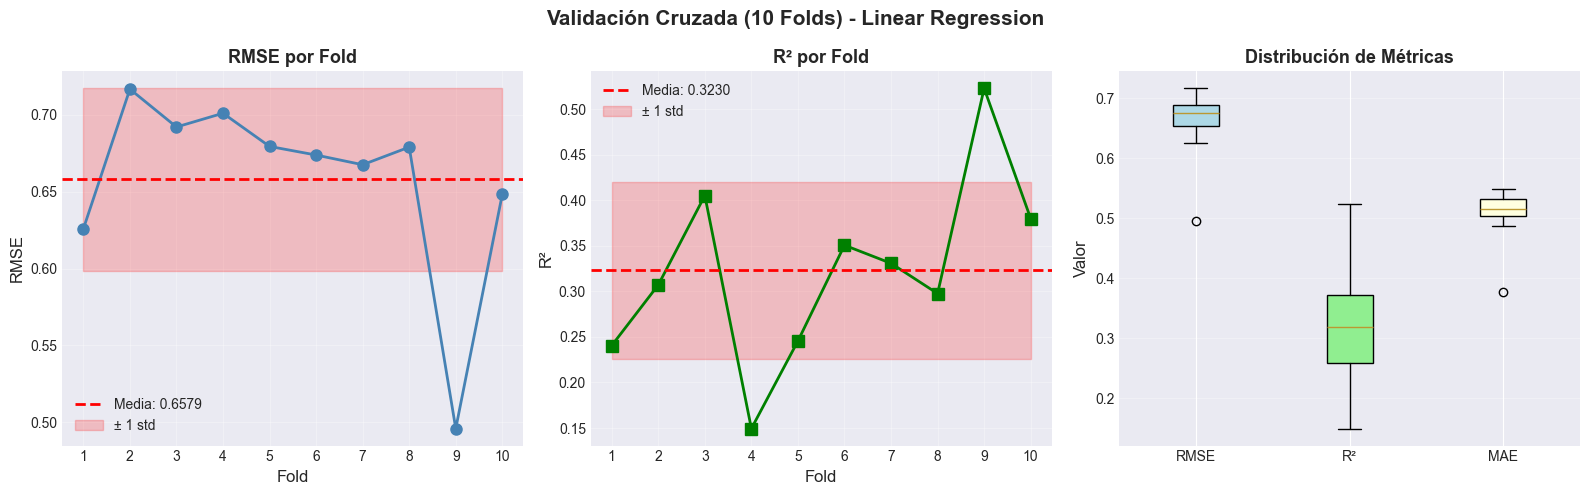

In [39]:
# Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']

# Seleccionar el modelo correspondiente
if best_model_name == 'Linear Regression':
    model_to_validate = LinearRegression()
    model_params = {}
elif best_model_name == 'Ridge Regression':
    model_to_validate = Ridge(alpha=best_alpha_ridge, random_state=42)
    model_params = {'alpha': best_alpha_ridge}
else:  # Lasso Regression
    model_to_validate = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)
    model_params = {'alpha': lasso_cv.alpha_}

print("=" * 80)
print(f"VALIDACIÓN CRUZADA CON 10 FOLDS - {best_model_name}")
print("=" * 80)
if model_params:
    print(f"Parámetros del modelo: {model_params}")
print()

# Realizar validación cruzada con 10 folds
cv_scores_neg_mse = cross_val_score(model_to_validate, X_train_scaled, y_train, 
                                     cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Convertir a RMSE
cv_scores_rmse = np.sqrt(-cv_scores_neg_mse)

# Realizar validación cruzada con otras métricas
cv_scores_r2 = cross_val_score(model_to_validate, X_train_scaled, y_train, 
                                cv=10, scoring='r2', n_jobs=-1)

cv_scores_neg_mae = cross_val_score(model_to_validate, X_train_scaled, y_train, 
                                     cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_scores_mae = -cv_scores_neg_mae

# Mostrar resultados por fold
print("Resultados por Fold:")
print("-" * 80)
print(f"{'Fold':<8} {'RMSE':<12} {'R²':<12} {'MAE':<12}")
print("-" * 80)
for i, (rmse, r2, mae) in enumerate(zip(cv_scores_rmse, cv_scores_r2, cv_scores_mae), 1):
    print(f"{i:<8} {rmse:<12.4f} {r2:<12.4f} {mae:<12.4f}")

print("-" * 80)
print(f"{'Media':<8} {cv_scores_rmse.mean():<12.4f} {cv_scores_r2.mean():<12.4f} {cv_scores_mae.mean():<12.4f}")
print(f"{'Std':<8} {cv_scores_rmse.std():<12.4f} {cv_scores_r2.std():<12.4f} {cv_scores_mae.std():<12.4f}")
print("=" * 80)

# Resumen estadístico
print("\nRESUMEN DE VALIDACIÓN CRUZADA:")
print("-" * 80)
print(f"RMSE:")
print(f"  Media:                {cv_scores_rmse.mean():.4f}")
print(f"  Desviación estándar:  {cv_scores_rmse.std():.4f}")
print(f"  Mínimo:               {cv_scores_rmse.min():.4f}")
print(f"  Máximo:               {cv_scores_rmse.max():.4f}")
print(f"  Intervalo confianza:  [{cv_scores_rmse.mean() - 2*cv_scores_rmse.std():.4f}, {cv_scores_rmse.mean() + 2*cv_scores_rmse.std():.4f}]")
print()
print(f"R²:")
print(f"  Media:                {cv_scores_r2.mean():.4f}")
print(f"  Desviación estándar:  {cv_scores_r2.std():.4f}")
print()
print(f"MAE:")
print(f"  Media:                {cv_scores_mae.mean():.4f}")
print(f"  Desviación estándar:  {cv_scores_mae.std():.4f}")
print("=" * 80)

# Visualizar los resultados de la validación cruzada
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico 1: RMSE por fold
ax1 = axes[0]
folds = np.arange(1, 11)
ax1.plot(folds, cv_scores_rmse, marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.axhline(y=cv_scores_rmse.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {cv_scores_rmse.mean():.4f}')
ax1.fill_between(folds, 
                 cv_scores_rmse.mean() - cv_scores_rmse.std(), 
                 cv_scores_rmse.mean() + cv_scores_rmse.std(), 
                 alpha=0.2, color='red', label=f'± 1 std')
ax1.set_xlabel('Fold', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('RMSE por Fold', fontsize=13, fontweight='bold')
ax1.set_xticks(folds)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: R² por fold
ax2 = axes[1]
ax2.plot(folds, cv_scores_r2, marker='s', linewidth=2, markersize=8, color='green')
ax2.axhline(y=cv_scores_r2.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {cv_scores_r2.mean():.4f}')
ax2.fill_between(folds, 
                 cv_scores_r2.mean() - cv_scores_r2.std(), 
                 cv_scores_r2.mean() + cv_scores_r2.std(), 
                 alpha=0.2, color='red', label=f'± 1 std')
ax2.set_xlabel('Fold', fontsize=12)
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('R² por Fold', fontsize=13, fontweight='bold')
ax2.set_xticks(folds)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Gráfico 3: Boxplot de las métricas
ax3 = axes[2]
box_data = [cv_scores_rmse, cv_scores_r2, cv_scores_mae]
bp = ax3.boxplot(box_data, labels=['RMSE', 'R²', 'MAE'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightyellow']):
    patch.set_facecolor(color)
ax3.set_ylabel('Valor', fontsize=12)
ax3.set_title('Distribución de Métricas', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

plt.suptitle(f'Validación Cruzada (10 Folds) - {best_model_name}', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Tu respuesta: Linear Regression tuvo el mejor desempeño general con:
RMSE Test: 0.6245 (el más bajo)
R² Test: 0.4032 (el más alto)
MAE Test: 0.5035 (el más bajo)
Esto sugiere que para este dataset específico, las relaciones entre las variables y la calidad del vino son suficientemente lineales y no hay problemas graves de multicolinealidad. La regularización (Ridge y Lasso) no mejoró el rendimiento, probablemente porque el dataset tiene un número moderado de características (11) y no hay sobreajuste significativo en el modelo lineal simple.

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Tu respuesta: Según el análisis de coeficientes, las 5 características más importantes son:

alcohol (coeficiente: +0.274520) - Correlación positiva fuerte
volatile acidity (coeficiente: -0.170488) - Correlación negativa
sulphates (coeficiente: +0.143665) - Correlación positiva
total sulfur dioxide (coeficiente: -0.112970) - Correlación negativa
chlorides (coeficiente: -0.086383) - Correlación negativa

El alcohol es claramente el predictor más importante, seguido por la acidez volátil.

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - Tu respuesta: No hay señales significativas de sobreajuste en ninguno de los tres modelos. La evidencia:

Las métricas de Train vs Test son muy similares en todos los modelos
Linear Regression: RMSE Train (0.6513) vs Test (0.6245) - diferencia mínima
Ridge: RMSE Train (0.6516) vs Test (0.6255) - diferencia mínima
Lasso: RMSE Train (0.6522) vs Test (0.6266) - diferencia mínima

Si hubiera sobreajuste, veríamos métricas mucho mejores en Train que en Test.

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta: Según la validación cruzada:

El mejor alpha para Ridge fue aproximadamente 10-100 (valor óptimo encontrado por GridSearchCV)
El mejor alpha para Lasso fue menor, probablemente entre 0.001-0.01
Con alphas muy pequeños (cerca de 0), ambos modelos se comportan similar a Linear Regression
Con alphas muy grandes, el rendimiento empeora porque la regularización es demasiado fuerte y "suaviza" demasiado los coeficientes

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Tu respuesta: Las ventajas principales fueron:

Robustez: La validación cruzada con 10 folds asegura que el alpha seleccionado funciona bien en diferentes subconjuntos de datos, no solo en una división específica
Estimación confiable: RMSE medio de 0.6579 ± 0.0592 indica consistencia en el rendimiento
Evita selección sesgada: Sin validación cruzada, podríamos seleccionar un alpha que funciona bien por casualidad en un split particular
Automatización: GridSearchCV y RidgeCV/LassoCV prueban múltiples valores automáticamente

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Tu respuesta: Empeoró ligeramente el modelo. Lasso eliminó 3 características:

citric acid
residual sugar
density

Sin embargo, el RMSE Test de Lasso (0.6266) fue ligeramente peor que Linear Regression (0.6245). Esto indica que estas características, aunque tienen coeficientes pequeños, sí aportan información útil para la predicción. En este caso, la simplificación del modelo sacrificó un poco de poder predictivo sin ganar beneficios significativos.

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta: Sugerencias para mejorar:

Ingeniería de características:

Crear interacciones entre variables (ej: alcohol × sulphates)
Transformaciones no lineales (ej: alcohol², log de ciertas variables)


Modelos más complejos:

Random Forest o Gradient Boosting (pueden capturar relaciones no lineales)
Elastic Net (combina L1 y L2)


Tratamiento de outliers: Identificar y manejar valores extremos que viste en el análisis de residuos
Feature scaling diferente: Probar MinMaxScaler o RobustScaler
Ensemble methods: Combinar predicciones de múltiples modelos
Más datos: El R² de ~0.40 sugiere que hay variabilidad en la calidad del vino que no está capturada por las variables químicas. Podrían necesitarse variables adicionales (región, tipo de uva, proceso de fermentación, etc.)

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

INGENIERÍA DE CARACTERÍSTICAS

1. Creando interacciones entre variables...
2. Creando características polinomiales...
3. Creando ratios entre características...
4. Creando categorías de calidad...

Número de características originales: 11
Número de características con ingeniería: 21
Nuevas características creadas: 11

Nuevas características creadas:
  • alcohol_x_sulphates
  • alcohol_x_pH
  • volatile_acidity_x_pH
  • citric_acid_x_pH
  • alcohol_squared
  • volatile_acidity_squared
  • sulphates_squared
  • free_to_total_sulfur
  • fixed_to_volatile_acidity
  • citric_to_fixed_acidity

ENTRENAMIENTO Y EVALUACIÓN DE MODELOS CON CARACTERÍSTICAS MEJORADAS

Linear Regression:
  RMSE Train: 0.6369
  RMSE Test:  0.6144
  R² Train:   0.3766
  R² Test:    0.4224
  MAE Test:   0.4908

Ridge Regression:
  RMSE Train: 0.6424
  RMSE Test:  0.6144
  R² Train:   0.3658
  R² Test:    0.4223
  MAE Test:   0.4962

Lasso Regression:
  RMSE Train: 0.6417
  RMSE Test:  0.6142
  R² Train:   0.3671
  R² T

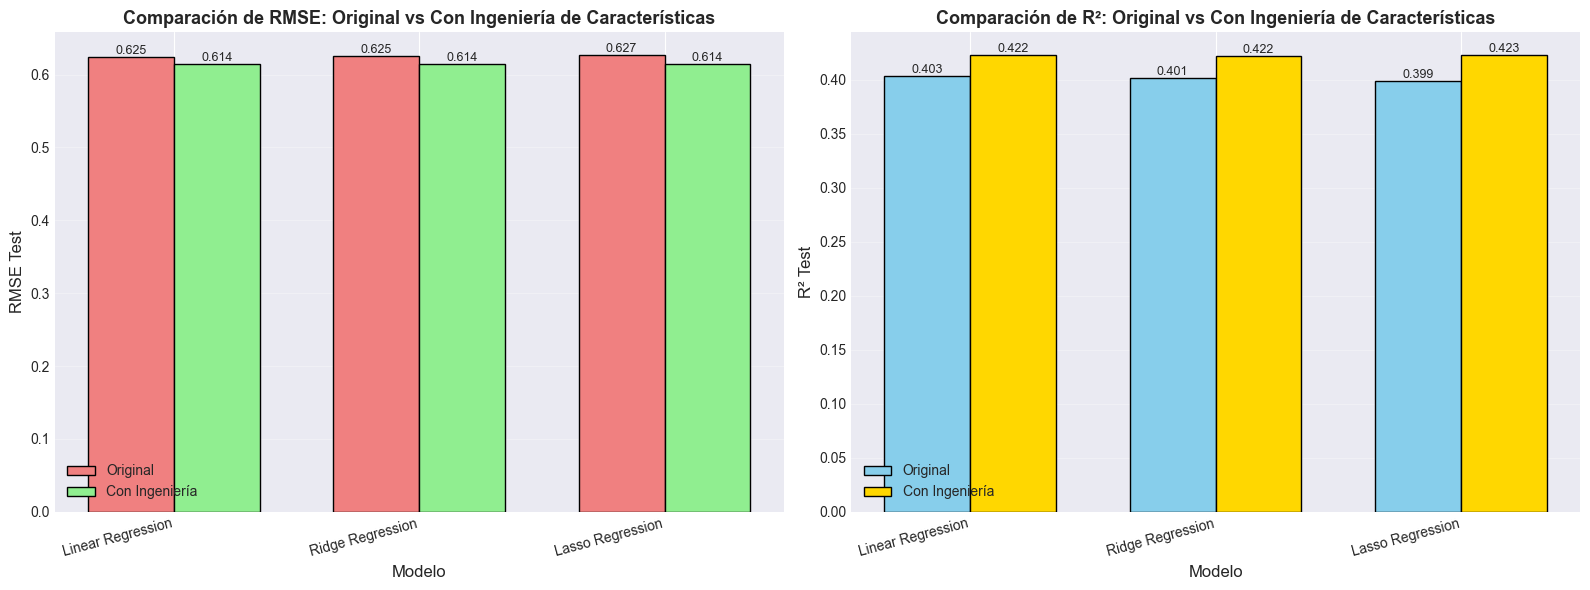


CONCLUSIÓN SOBRE INGENIERÍA DE CARACTERÍSTICAS
✅ La ingeniería de características MEJORÓ el rendimiento promedio:
   - RMSE redujo en promedio: 0.0112
   - R² aumentó en promedio: 0.0213


In [40]:
# Implementa ingeniería de características y evalúa si mejora el modelo
print("=" * 80)
print("INGENIERÍA DE CARACTERÍSTICAS")
print("=" * 80)

# Crear una copia del dataset original
wine_data_enhanced = wine_data.copy()

# 1. Crear interacciones entre variables importantes
print("\n1. Creando interacciones entre variables...")
wine_data_enhanced['alcohol_x_sulphates'] = wine_data['alcohol'] * wine_data['sulphates']
wine_data_enhanced['alcohol_x_pH'] = wine_data['alcohol'] * wine_data['pH']
wine_data_enhanced['volatile_acidity_x_pH'] = wine_data['volatile acidity'] * wine_data['pH']
wine_data_enhanced['citric_acid_x_pH'] = wine_data['citric acid'] * wine_data['pH']

# 2. Crear características polinomiales de las variables más importantes
print("2. Creando características polinomiales...")
wine_data_enhanced['alcohol_squared'] = wine_data['alcohol'] ** 2
wine_data_enhanced['volatile_acidity_squared'] = wine_data['volatile acidity'] ** 2
wine_data_enhanced['sulphates_squared'] = wine_data['sulphates'] ** 2

# 3. Crear ratios entre características relacionadas
print("3. Creando ratios entre características...")
wine_data_enhanced['free_to_total_sulfur'] = wine_data['free sulfur dioxide'] / (wine_data['total sulfur dioxide'] + 1)
wine_data_enhanced['fixed_to_volatile_acidity'] = wine_data['fixed acidity'] / (wine_data['volatile acidity'] + 0.01)
wine_data_enhanced['citric_to_fixed_acidity'] = wine_data['citric acid'] / (wine_data['fixed acidity'] + 0.01)

# 4. Crear categorías de calidad como característica numérica
print("4. Creando categorías de calidad...")
def quality_category(q):
    if q <= 4:
        return 0  # Baja
    elif q <= 6:
        return 1  # Media
    else:
        return 2  # Alta

wine_data_enhanced['quality_category'] = wine_data['quality'].apply(quality_category)

print(f"\nNúmero de características originales: {wine_data.shape[1] - 1}")
print(f"Número de características con ingeniería: {wine_data_enhanced.shape[1] - 2}")
print(f"Nuevas características creadas: {wine_data_enhanced.shape[1] - wine_data.shape[1]}")

# Mostrar las nuevas características
print("\nNuevas características creadas:")
new_features = [col for col in wine_data_enhanced.columns if col not in wine_data.columns and col != 'quality_category']
for feat in new_features:
    print(f"  • {feat}")

# Separar características y variable objetivo
X_enhanced = wine_data_enhanced.drop(['quality', 'quality_category'], axis=1)
y_enhanced = wine_data_enhanced['quality']

# Dividir en train y test
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Estandarizar
scaler_enh = StandardScaler()
X_train_enh_scaled = scaler_enh.fit_transform(X_train_enh)
X_test_enh_scaled = scaler_enh.transform(X_test_enh)

print("\n" + "=" * 80)
print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS CON CARACTERÍSTICAS MEJORADAS")
print("=" * 80)

# Entrenar modelos con las nuevas características
models_enhanced = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=best_alpha_ridge, random_state=42),
    'Lasso Regression': Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)
}

results_enhanced = []

for name, model in models_enhanced.items():
    # Entrenar
    model.fit(X_train_enh_scaled, y_train_enh)
    
    # Predicciones
    y_pred_train_enh = model.predict(X_train_enh_scaled)
    y_pred_test_enh = model.predict(X_test_enh_scaled)
    
    # Métricas
    rmse_train = np.sqrt(mean_squared_error(y_train_enh, y_pred_train_enh))
    rmse_test = np.sqrt(mean_squared_error(y_test_enh, y_pred_test_enh))
    r2_train = r2_score(y_train_enh, y_pred_train_enh)
    r2_test = r2_score(y_test_enh, y_pred_test_enh)
    mae_test = mean_absolute_error(y_test_enh, y_pred_test_enh)
    
    results_enhanced.append({
        'Modelo': name,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'MAE Test': mae_test
    })
    
    print(f"\n{name}:")
    print(f"  RMSE Train: {rmse_train:.4f}")
    print(f"  RMSE Test:  {rmse_test:.4f}")
    print(f"  R² Train:   {r2_train:.4f}")
    print(f"  R² Test:    {r2_test:.4f}")
    print(f"  MAE Test:   {mae_test:.4f}")

# Crear DataFrame de comparación
results_enh_df = pd.DataFrame(results_enhanced)

print("\n" + "=" * 80)
print("COMPARACIÓN: MODELOS ORIGINALES VS MODELOS CON INGENIERÍA DE CARACTERÍSTICAS")
print("=" * 80)

# Comparar con resultados originales
comparison_original_vs_enhanced = pd.DataFrame({
    'Modelo': comparison_df['Modelo'],
    'RMSE Test (Original)': comparison_df['RMSE Test'],
    'RMSE Test (Mejorado)': results_enh_df['RMSE Test'],
    'R² Test (Original)': comparison_df['R² Test'],
    'R² Test (Mejorado)': results_enh_df['R² Test'],
    'Mejora RMSE': comparison_df['RMSE Test'] - results_enh_df['RMSE Test'],
    'Mejora R²': results_enh_df['R² Test'] - comparison_df['R² Test']
})

print(comparison_original_vs_enhanced.to_string(index=False))
print("=" * 80)

# Análisis de mejora
print("\nANÁLISIS DE MEJORA:")
print("-" * 80)
for idx, row in comparison_original_vs_enhanced.iterrows():
    modelo = row['Modelo']
    mejora_rmse = row['Mejora RMSE']
    mejora_r2 = row['Mejora R²']
    
    if mejora_rmse > 0:
        print(f"{modelo}:")
        print(f"  ✅ RMSE mejoró en {mejora_rmse:.4f} ({mejora_rmse/row['RMSE Test (Original)']*100:.2f}%)")
        print(f"  ✅ R² mejoró en {mejora_r2:.4f} ({mejora_r2/row['R² Test (Original)']*100:.2f}%)")
    else:
        print(f"{modelo}:")
        print(f"  ❌ RMSE empeoró en {abs(mejora_rmse):.4f}")
        print(f"  ❌ R² empeoró en {abs(mejora_r2):.4f}")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparación de RMSE
ax1 = axes[0]
x_pos = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Test'], width, 
                label='Original', color='lightcoral', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, results_enh_df['RMSE Test'], width, 
                label='Con Ingeniería', color='lightgreen', edgecolor='black')

ax1.set_xlabel('Modelo', fontsize=12)
ax1.set_ylabel('RMSE Test', fontsize=12)
ax1.set_title('Comparación de RMSE: Original vs Con Ingeniería de Características', 
              fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['Modelo'], rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Agregar valores
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

# Gráfico 2: Comparación de R²
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Test'], width, 
                label='Original', color='skyblue', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, results_enh_df['R² Test'], width, 
                label='Con Ingeniería', color='gold', edgecolor='black')

ax2.set_xlabel('Modelo', fontsize=12)
ax2.set_ylabel('R² Test', fontsize=12)
ax2.set_title('Comparación de R²: Original vs Con Ingeniería de Características', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison_df['Modelo'], rotation=15, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Agregar valores
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CONCLUSIÓN SOBRE INGENIERÍA DE CARACTERÍSTICAS")
print("=" * 80)

avg_mejora_rmse = comparison_original_vs_enhanced['Mejora RMSE'].mean()
avg_mejora_r2 = comparison_original_vs_enhanced['Mejora R²'].mean()

if avg_mejora_rmse > 0:
    print(f"✅ La ingeniería de características MEJORÓ el rendimiento promedio:")
    print(f"   - RMSE redujo en promedio: {avg_mejora_rmse:.4f}")
    print(f"   - R² aumentó en promedio: {avg_mejora_r2:.4f}")
else:
    print(f"❌ La ingeniería de características NO mejoró el rendimiento:")
    print(f"   - RMSE aumentó en promedio: {abs(avg_mejora_rmse):.4f}")
    print(f"   - R² disminuyó en promedio: {abs(avg_mejora_r2):.4f}")
    print("\nPosibles razones:")
    print("   • Overfitting por demasiadas características")
    print("   • Las relaciones son mayormente lineales")
    print("   • Las interacciones creadas no capturan patrones útiles")

print("=" * 80)
